In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette("rainbow_r")
import matplotlib.style
plt.style.use('seaborn')
import sklearn.metrics as metrics
import os
import warnings
warnings.filterwarnings("ignore")

In [12]:
df=pd.read_csv('Transformed_Data_Case_Study.csv') 

In [13]:
df.head()

,OID,Region,Account Segmentation,TCV,Annuity,eXcell,Prod - Commodity,Prod - Enterprise,Project,Sales Gestation,...,Time to Start Service,Target,Closed/No Action_Days_Spent,Contracting/Closing_Days_Spent,Identify_Days_Spent,Lead (Above the Funnel)_Days_Spent,Negotiate_Days_Spent,Propose_Days_Spent,Qualify_Days_Spent,Information_Days_Spent
0,OID1569,2,3,26079990.0,1,0,0,0,0,501,...,6,1,8,16,34,0,2,33,19,35
1,OID1850,1,1,13100000.0,1,0,0,0,0,249,...,78,1,4,8,17,0,1,16,9,17
2,OID1378,1,1,50658.0,1,0,0,0,0,4,...,13,1,0,0,0,0,0,0,0,0
3,OID1473,3,7,10168147.0,1,0,0,0,0,206,...,512,1,3,7,14,0,1,14,8,14
4,OID0125,4,1,143150.0,0,0,0,0,1,96,...,23,1,2,3,7,0,0,6,4,7


In [14]:
df = df.drop("OID", axis=1)

In [15]:
df.head()

,Region,Account Segmentation,TCV,Annuity,eXcell,Prod - Commodity,Prod - Enterprise,Project,Sales Gestation,Service Period,Time to Start Service,Target,Closed/No Action_Days_Spent,Contracting/Closing_Days_Spent,Identify_Days_Spent,Lead (Above the Funnel)_Days_Spent,Negotiate_Days_Spent,Propose_Days_Spent,Qualify_Days_Spent,Information_Days_Spent
0,2,3,26079990.0,1,0,0,0,0,501,1825,6,1,8,16,34,0,2,33,19,35
1,1,1,13100000.0,1,0,0,0,0,249,1108,78,1,4,8,17,0,1,16,9,17
2,1,1,50658.0,1,0,0,0,0,4,16,13,1,0,0,0,0,0,0,0,0
3,3,7,10168147.0,1,0,0,0,0,206,1825,512,1,3,7,14,0,1,14,8,14
4,4,1,143150.0,0,0,0,0,1,96,426,23,1,2,3,7,0,0,6,4,7


In [16]:
df.head().T

,0,1,2,3,4
Region,2.0,1.0,1.0,3.0,4.0
Account Segmentation,3.0,1.0,1.0,7.0,1.0
TCV,26079990.0,13100000.0,50658.0,10168147.0,143150.0
Annuity,1.0,1.0,1.0,1.0,0.0
eXcell,0.0,0.0,0.0,0.0,0.0
Prod - Commodity,0.0,0.0,0.0,0.0,0.0
Prod - Enterprise,0.0,0.0,0.0,0.0,0.0
Project,0.0,0.0,0.0,0.0,1.0
Sales Gestation,501.0,249.0,4.0,206.0,96.0
Service Period,1825.0,1108.0,16.0,1825.0,426.0


In [17]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 2216 
The number of columns (variables) is 20


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 20 columns):
Region                                2216 non-null int64
Account Segmentation                  2216 non-null int64
TCV                                   2216 non-null float64
Annuity                               2216 non-null int64
eXcell                                2216 non-null int64
Prod - Commodity                      2216 non-null int64
Prod - Enterprise                     2216 non-null int64
Project                               2216 non-null int64
Sales Gestation                       2216 non-null int64
Service Period                        2216 non-null int64
Time to Start Service                 2216 non-null int64
Target                                2216 non-null int64
Closed/No Action_Days_Spent           2216 non-null int64
Contracting/Closing_Days_Spent        2216 non-null int64
Identify_Days_Spent                   2216 non-null int64
Lead (Above the Funne

In [19]:
df.duplicated().sum()

47

In [20]:
df.isnull().sum()

Region                                0
Account Segmentation                  0
TCV                                   0
Annuity                               0
eXcell                                0
Prod - Commodity                      0
Prod - Enterprise                     0
Project                               0
Sales Gestation                       0
Service Period                        0
Time to Start Service                 0
Target                                0
Closed/No Action_Days_Spent           0
Contracting/Closing_Days_Spent        0
Identify_Days_Spent                   0
Lead (Above the Funnel)_Days_Spent    0
Negotiate_Days_Spent                  0
Propose_Days_Spent                    0
Qualify_Days_Spent                    0
Information_Days_Spent                0
dtype: int64

In [21]:
df.shape

(2216, 20)

In [22]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Region,2216.0,2.55,1.17,1.0,2.0,3.0,3.00,5.000000e+00
Account Segmentation,2216.0,3.65,2.43,1.0,1.0,3.0,4.00,9.000000e+00
TCV,2216.0,4506915.07,63616620.13,-1268348.0,0.0,9957.0,130657.50,1.000000e+09
Annuity,2216.0,0.36,0.48,0.0,0.0,0.0,1.00,1.000000e+00
eXcell,2216.0,0.02,0.14,0.0,0.0,0.0,0.00,1.000000e+00
Prod - Commodity,2216.0,0.19,0.39,0.0,0.0,0.0,0.00,1.000000e+00
Prod - Enterprise,2216.0,0.11,0.31,0.0,0.0,0.0,0.00,1.000000e+00
Project,2216.0,0.32,0.47,0.0,0.0,0.0,1.00,1.000000e+00
Sales Gestation,2216.0,106.89,130.26,-465.0,21.0,53.5,148.25,1.304000e+03
Service Period,2216.0,289.54,384.23,0.0,0.0,151.0,365.00,2.028000e+03


In [23]:
df.Target.value_counts()

1    1968
0     248
Name: Target, dtype: int64

Text(0.5, 1.0, 'Target Proportion ')

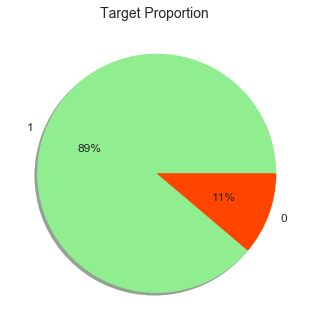

In [24]:
colors = ['cyan','red','yellow','green','orange','blue']
#plt.figure(figsize=(5,5))
df.Target.value_counts(normalize=True).plot(kind='pie', 
                                                 autopct='%1.0f%%', 
                                                 colors = ['lightgreen','orangered'],
                                                 shadow = True,
                                                 labels = ['1','0'],
                                                 fontsize = 12)
plt.ylabel('')
plt.title('Target Proportion ', fontsize=14)

In [25]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Region,2.0,1.0,1.0,3.0,4.0,3.0,2.0,2.0,1.0,3.0
Account Segmentation,3.0,1.0,1.0,7.0,1.0,3.0,4.0,3.0,1.0,3.0
TCV,26079990.0,13100000.0,50658.0,10168147.0,143150.0,305925.0,0.0,6322572.0,0.0,53875.0
Annuity,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
eXcell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Prod - Commodity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Prod - Enterprise,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Project,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Sales Gestation,501.0,249.0,4.0,206.0,96.0,322.0,1304.0,1165.0,102.0,289.0
Service Period,1825.0,1108.0,16.0,1825.0,426.0,1825.0,365.0,1095.0,365.0,1184.0


In [26]:
df.Region.value_counts()

3    634
2    579
1    513
4    373
5    117
Name: Region, dtype: int64

In [27]:
df.rename(columns = {'Account Segmentation':'Account_Segmentation'}, inplace = True) 

In [28]:
df.Account_Segmentation.value_counts()

3    772
1    603
4    311
8    296
6     89
9     68
5     39
7     27
2     11
Name: Account_Segmentation, dtype: int64

In [29]:
df.Annuity.value_counts()

0    1413
1     803
Name: Annuity, dtype: int64

In [30]:
df.eXcell.value_counts()

0    2173
1      43
Name: eXcell, dtype: int64

In [31]:
df.rename(columns = {'Prod - Commodity':'Prod_Commodity'}, inplace = True) 

In [32]:
df.Prod_Commodity.value_counts()

0    1793
1     423
Name: Prod_Commodity, dtype: int64

In [33]:
df.rename(columns = {'Prod - Enterprise':'Prod_Enterprise'}, inplace = True) 

In [34]:
df.Prod_Enterprise.value_counts()

0    1973
1     243
Name: Prod_Enterprise, dtype: int64

In [35]:
df.Project.value_counts()

0    1512
1     704
Name: Project, dtype: int64

(20.5, -0.5)

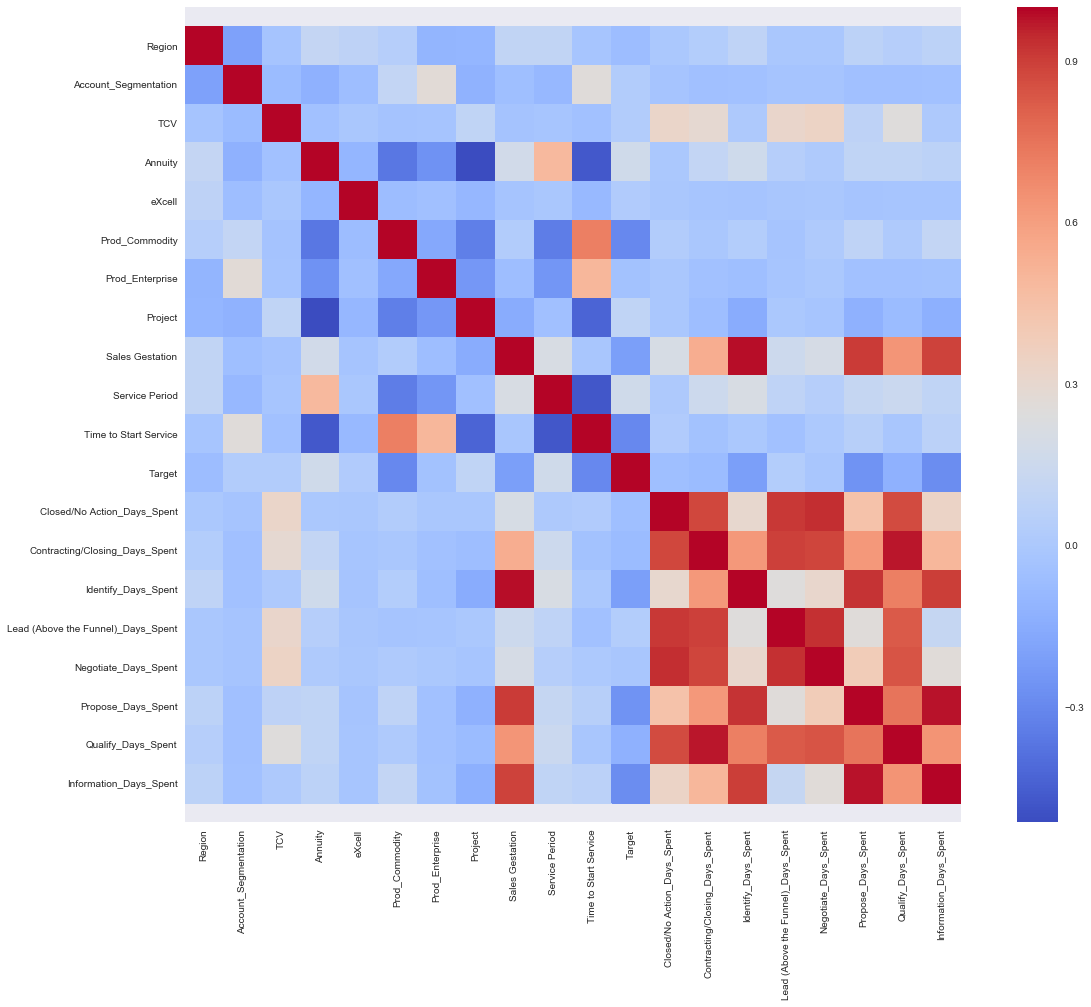

In [36]:
plt.figure(figsize=(20,15))
ax=sns.heatmap(df.corr(),cmap='coolwarm',square=True)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)

In [37]:
df.rename(columns = {'Time to Start Service':'Time_to_Start_Service'}, inplace = True) 

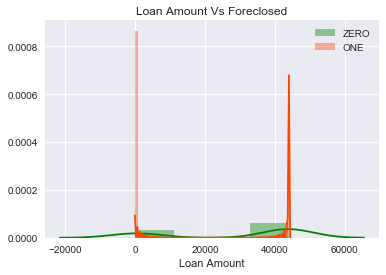

In [38]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.Target==0].Time_to_Start_Service, label = 'ZERO', color = 'green')
sns.distplot(df[df.Target==1].Time_to_Start_Service, label = 'ONE', color = 'orangered')
ax.set_title('Loan Amount Vs Foreclosed',fontsize=12)
ax.set_xlabel('Loan Amount')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

In [39]:
df.rename(columns = {'Service Period':'Service_Period'}, inplace = True) 

In [40]:
df.rename(columns = {'Sales Gestation':'Sales_Gestation'}, inplace = True) 

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 20 columns):
Region                                2216 non-null int64
Account_Segmentation                  2216 non-null int64
TCV                                   2216 non-null float64
Annuity                               2216 non-null int64
eXcell                                2216 non-null int64
Prod_Commodity                        2216 non-null int64
Prod_Enterprise                       2216 non-null int64
Project                               2216 non-null int64
Sales_Gestation                       2216 non-null int64
Service_Period                        2216 non-null int64
Time_to_Start_Service                 2216 non-null int64
Target                                2216 non-null int64
Closed/No Action_Days_Spent           2216 non-null int64
Contracting/Closing_Days_Spent        2216 non-null int64
Identify_Days_Spent                   2216 non-null int64
Lead (Above the Funne

In [42]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_df = X.fit_transform(df)
scaled_df

array([[-0.47062653, -0.26693108,  0.33918721, ...,  3.50465471,
         1.91072074,  3.67895841],
       [-1.32687315, -1.09134818,  0.13510659, ...,  1.24904929,
         0.60287297,  1.33843251],
       [-1.32687315, -1.09134818, -0.07006444, ..., -0.87387347,
        -0.57419003, -0.87206418],
       ...,
       [ 1.24186671, -0.26693108, -0.04057898, ...,  0.05490524,
         0.47208819, -0.09188888],
       [ 1.24186671,  0.55748602, -0.06578675, ...,  0.32027058,
         0.73365775,  0.03814034],
       [ 0.38562009, -1.09134818, -0.0642448 , ..., -0.47582545,
        -0.05105092, -0.61200575]])

In [56]:
scaled_df = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)
scaled_df.head()
scaled_df['Target']=df['Target']

In [57]:
# Copy all the predictor variables into X dataframe
X = scaled_df.drop('Target', axis=1)

# Copy target into the y dataframe.  
y = scaled_df['Target']

In [58]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=27)

In [59]:
from sklearn.linear_model import LogisticRegression
# Fit the Logistic Regression model
#logit_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',n_jobs=2)
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
ytrain_predict = logit_model.predict(X_train)
ytest_predict = logit_model.predict(X_test)

In [48]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(10)

,0,1
525,0.006944,0.993056
302,0.009606,0.990394
523,0.159787,0.840213
100,0.024065,0.975935
331,0.048272,0.951728
574,0.050967,0.949033
527,0.000887,0.999113
110,0.432457,0.567543
487,0.014359,0.985641
357,0.020091,0.979909


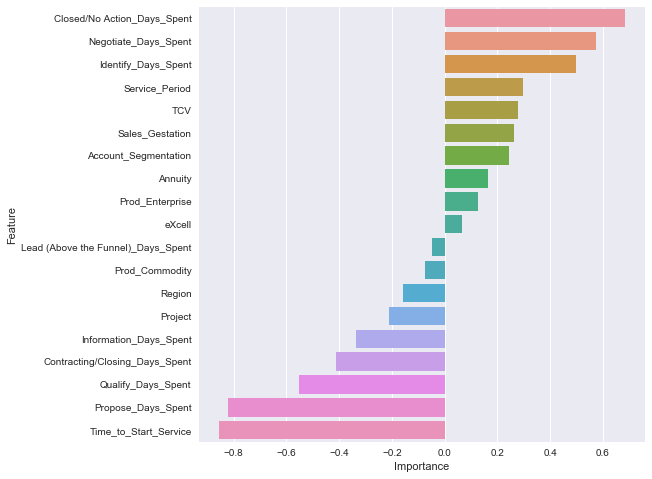

In [49]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : logit_model.coef_[0]})
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(8,8))
sns.barplot(y='Feature', x='Importance', data=feature_rank)

In [50]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [51]:
def performance_matrices(model, X_data, y_data, y_predicted):
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of minority class, conservative
    precision=round(met_df.loc["0"][0],2)
    recall=round(met_df.loc["0"][1],2)
    f1=round(met_df.loc["0"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [52]:
logit_met,logit_train_accu, logit_train_precision, logit_train_recall, logit_train_f1 = performance_matrices(logit_model, X_train, y_train, ytrain_predict)
print ('logit_train_accu ',logit_train_accu)
print ('logit_train_precision ',logit_train_precision)
print ('logit_train_recall ',logit_train_recall)
print ('logit_train_f1 ',logit_train_f1)

logit_train_accu  0.9
logit_train_precision  0.34
logit_train_recall  0.63
logit_train_f1  0.23


In [53]:
logit_met,logit_test_accu, logit_test_precision, logit_test_recall, logit_test_f1 = performance_matrices(logit_model, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.9
logit_test_precision  0.29
logit_test_recall  0.56
logit_test_f1  0.2


# ANN

In [54]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.001)

In [55]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Iteration 1, loss = 0.71613707
Iteration 2, loss = 0.66468951
Iteration 3, loss = 0.60214925
Iteration 4, loss = 0.54500969
Iteration 5, loss = 0.49792844
Iteration 6, loss = 0.45944514
Iteration 7, loss = 0.42962237
Iteration 8, loss = 0.40582816
Iteration 9, loss = 0.38611917
Iteration 10, loss = 0.37056157
Iteration 11, loss = 0.35762606
Iteration 12, loss = 0.34668816
Iteration 13, loss = 0.33735059
Iteration 14, loss = 0.32940986
Iteration 15, loss = 0.32254958
Iteration 16, loss = 0.31662096
Iteration 17, loss = 0.31122038
Iteration 18, loss = 0.30659711
Iteration 19, loss = 0.30244655
Iteration 20, loss = 0.29870596
Iteration 21, loss = 0.29540754
Iteration 22, loss = 0.29231375
Iteration 23, loss = 0.28959286
Iteration 24, loss = 0.28706081
Iteration 25, loss = 0.28470721
Iteration 26, loss = 0.28262466
Iteration 27, loss = 0.28070278
Iteration 28, loss = 0.27889284
Iteration 29, loss = 0.27723845
Iteration 30, loss = 0.27569342
Iteration 31, loss = 0.27430013
Iteration 32, los

In [60]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 19,  52],
       [ 11, 583]], dtype=int64)

In [62]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.27      0.38        71
           1       0.92      0.98      0.95       594

   micro avg       0.91      0.91      0.91       665
   macro avg       0.78      0.62      0.66       665
weighted avg       0.89      0.91      0.89       665



In [64]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[ 19  52]
 [ 11 583]]
              precision    recall  f1-score   support

           0       0.63      0.27      0.38        71
           1       0.92      0.98      0.95       594

   micro avg       0.91      0.91      0.91       665
   macro avg       0.78      0.62      0.66       665
weighted avg       0.89      0.91      0.89       665



In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9052631578947369

# Bagging using RandomForest

In [68]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#rfcl = RandomForestClassifier(class_weight='balanced')
rfcl = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=20,random_state=1)
#Bagging_model.fit(X_train_res, y_train_res)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [69]:
#ytrain_predict = Bagging_model.predict(X_train_res)
ytrain_predict = Bagging_model.predict(X_train)
ytest_predict = Bagging_model.predict(X_test)

In [70]:
Bagging_met,Bagging_test_accu,Bagging_test_precision,Bagging_test_recall,Bagging_test_f1 = performance_matrices(Bagging_model, X_test, y_test, ytest_predict)
print ('Bagging_test_accu ',Bagging_test_accu)
print ('Bagging_test_precision ',Bagging_test_precision)
print ('Bagging_test_recall ',Bagging_test_recall)
print ('Bagging_test_f1 ',Bagging_test_f1)

Bagging_test_accu  0.97
Bagging_test_precision  0.86
Bagging_test_recall  0.86
Bagging_test_f1  0.86


In [73]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(Bagging_model, X, y, cv=5))
print(np.mean(cross_val_score(Bagging_model, X, y, cv=5)))

[0.88963964 0.96846847 0.94594595 0.97963801 0.92081448]
0.9409013085483673


# KNN Model

In [78]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [79]:
ytrain_predict = KNN_model.predict(X_train)
ytest_predict = KNN_model.predict(X_test)

In [80]:
KNN_met,KNN_test_accu,KNN_test_precision,KNN_test_recall,KNN_test_f1 = performance_matrices(KNN_model, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_accu  0.92
KNN_test_precision  0.57
KNN_test_recall  0.63
KNN_test_f1  0.52


In [82]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(KNN_model, X, y, cv=5))
print(np.mean(cross_val_score(KNN_model, X, y, cv=5)))

[0.84459459 0.88513514 0.87387387 0.91402715 0.90045249]
0.8836166483225307


In [83]:
df1=pd.read_csv('Submission File.csv') 

In [84]:
df1.head()

,OID,Region,Account Segmentation,Term in Months,TCV,Annuity,eXcell,Prod - Commodity,Prod - Enterprise,Project,...,Service Period,Time to Start Service,Closed/No Action_Days_Spent,Contracting/Closing_Days_Spent,Identify_Days_Spent,Lead (Above the Funnel)_Days_Spent,Negotiate_Days_Spent,Propose_Days_Spent,Qualify_Days_Spent,Information_Days_Spent
0,OID3597,2,3,13.0,55253,1,0,0,0,0,...,395,23,0,4,5,1,0,2,3,2
1,OID6322,3,6,NaN,0,0,0,1,0,0,...,0,43553,1,9,11,3,1,6,7,4
2,OID1550,1,1,12.0,-20321,1,0,0,0,0,...,364,520,3,22,28,8,3,14,17,11
3,OID92,3,9,36.0,759135,1,0,0,0,0,...,1095,32,1,9,11,3,1,5,7,4
4,OID1666,2,1,13.0,156751,1,0,0,0,0,...,402,2,2,19,24,7,2,12,14,9


In [86]:
df1 = df1.drop("OID", axis=1)

In [87]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_df1 = X.fit_transform(df1)
scaled_df1

array([[-5.34838302e-01, -1.27348597e-01, -4.57770430e-01,
        -4.96696331e-01,  4.62910050e-01, -1.74077656e-01,
        -1.74077656e-01, -1.74077656e-01, -3.11085508e-01,
        -1.31945068e+00, -4.19597546e-01, -1.77853535e-01,
        -1.59680580e+00, -1.29979199e+00, -1.28848664e+00,
        -1.40914246e+00, -1.59680580e+00, -1.37851671e+00,
        -1.28011520e+00, -1.27307874e+00],
       [ 2.91729983e-01,  1.05352021e+00,             nan,
        -5.04820044e-01, -2.16024690e+00, -1.74077656e-01,
         5.74456265e+00, -1.74077656e-01, -3.11085508e-01,
        -7.23807675e-01, -1.21789688e+00,  5.74414221e+00,
        -7.61553537e-01, -7.24363243e-01, -7.39736590e-01,
        -8.02676084e-01, -7.61553537e-01, -6.51856740e-01,
        -6.73510086e-01, -8.19836049e-01],
       [-1.36140659e+00, -9.14594470e-01, -5.19429304e-01,
        -5.07807791e-01,  4.62910050e-01, -1.74077656e-01,
        -1.74077656e-01, -1.74077656e-01, -3.11085508e-01,
         7.93514503e-01, -4.8

In [93]:
X_test1 =scaled_df1


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [94]:
y_pred =KNN_model.predict(X_test1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').